In [698]:
import pandas as pd
import numpy as np
import json

import string

from tqdm import tqdm
tqdm.pandas()

In [699]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils

import matplotlib.pyplot as plt
%matplotlib inline 

In [700]:
#pip install pymorphy2

In [701]:
#pip install -U pymorphy2-dicts-ru

In [702]:
with open('D:/AgoraHack/agorahack-case1-team0/agora_hack_products/agora_hack_products.json', encoding='utf-8') as f:
   prdct = json.load(f)

In [703]:
prdct[0]

{'product_id': '0007302f2fe1d54d',
 'name': 'Классическая сплит-система ROYAL CLIMA PANDORA RC-PD28HN, для комнат до 28 кв.метра, настенный кондиционер для дома/офиса, комплект',
 'props': ['Класс  энергоэффективности\tA',
  'Мощность  кондиционера\t9 BTU',
  'Уровень  шума внутреннего блока\t21.5 дБ - 38 дБ',
  'Режим   работы\tохлаждение / обогрев',
  'Фильтр тонкой очистки\tесть',
  'Доп.   режимы турбо, экорежим, осушение, ночной, вентиляция'],
 'is_reference': False,
 'reference_id': 'f497219eb0077f84'}

In [704]:
df = pd.DataFrame.from_dict(prdct, orient='columns')

In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251 entries, 0 to 3250
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    3251 non-null   object
 1   name          3251 non-null   object
 2   props         3251 non-null   object
 3   is_reference  3251 non-null   bool  
 4   reference_id  2780 non-null   object
dtypes: bool(1), object(4)
memory usage: 104.9+ KB


In [706]:
df.sample(3)

product_id                                               name  \
336   1ad7af946f19fd98  Пылесос Xiaomi Mi Robot Vacuum-Mop 2 Ultra чер...   
1526  7718d8d43e3dbf56  Ноутбук Lenovo IdeaPad Gaming 3 15ACH6 82K201D...   
1272  645dadb093a2f6ee  Видеокарта GigaByte Radeon RX 6400 Eagle 4G 19...   

                                                  props  is_reference  \
336   [Доп. функции построение карты помещения, прог...         False   
1526          [Накопитель\t256 ГБ, Цвет товара\tчерный]         False   
1272          [Тип   памяти\tGDDR6, Техпроцесс\t6   нм]         False   

          reference_id  
336   349fdfb870581e8c  
1526  11777853e7c22618  
1272  e890f739eb760654

In [707]:
df[df['is_reference'] == True].count()

product_id      471
name            471
props           471
is_reference    471
reference_id      0
dtype: int64

In [708]:
labels = df[df['is_reference'] == True]['reference_id'].count()

In [709]:
df.loc[(df['is_reference'] == True),'reference_id'] = df['product_id']

In [710]:
df[df['is_reference'] == True].sample(3)

product_id                                               name  \
1718  856751a358b2734a  Встраиваемая посудомоечная машина Gorenje GV62...   
1793  8abff1fd30760f44  65" Телевизор Xiaomi E65S Pro 2019 LED, HDR CN...   
902   46889124439ddfa4           Микроволновая печь LG MW25R35GISW, белый   

                                                  props  is_reference  \
1718  [Тип\tполноразмерная, Вместимость\t13 комплект...          True   
1793  [Диагональ\t65", Разрешение HD\t4K UHD, Платфо...          True   
902   [Мощность микроволн\t1000 Вт, Инверторное упра...          True   

          reference_id  
1718  856751a358b2734a  
1793  8abff1fd30760f44  
902   46889124439ddfa4

<AxesSubplot:>

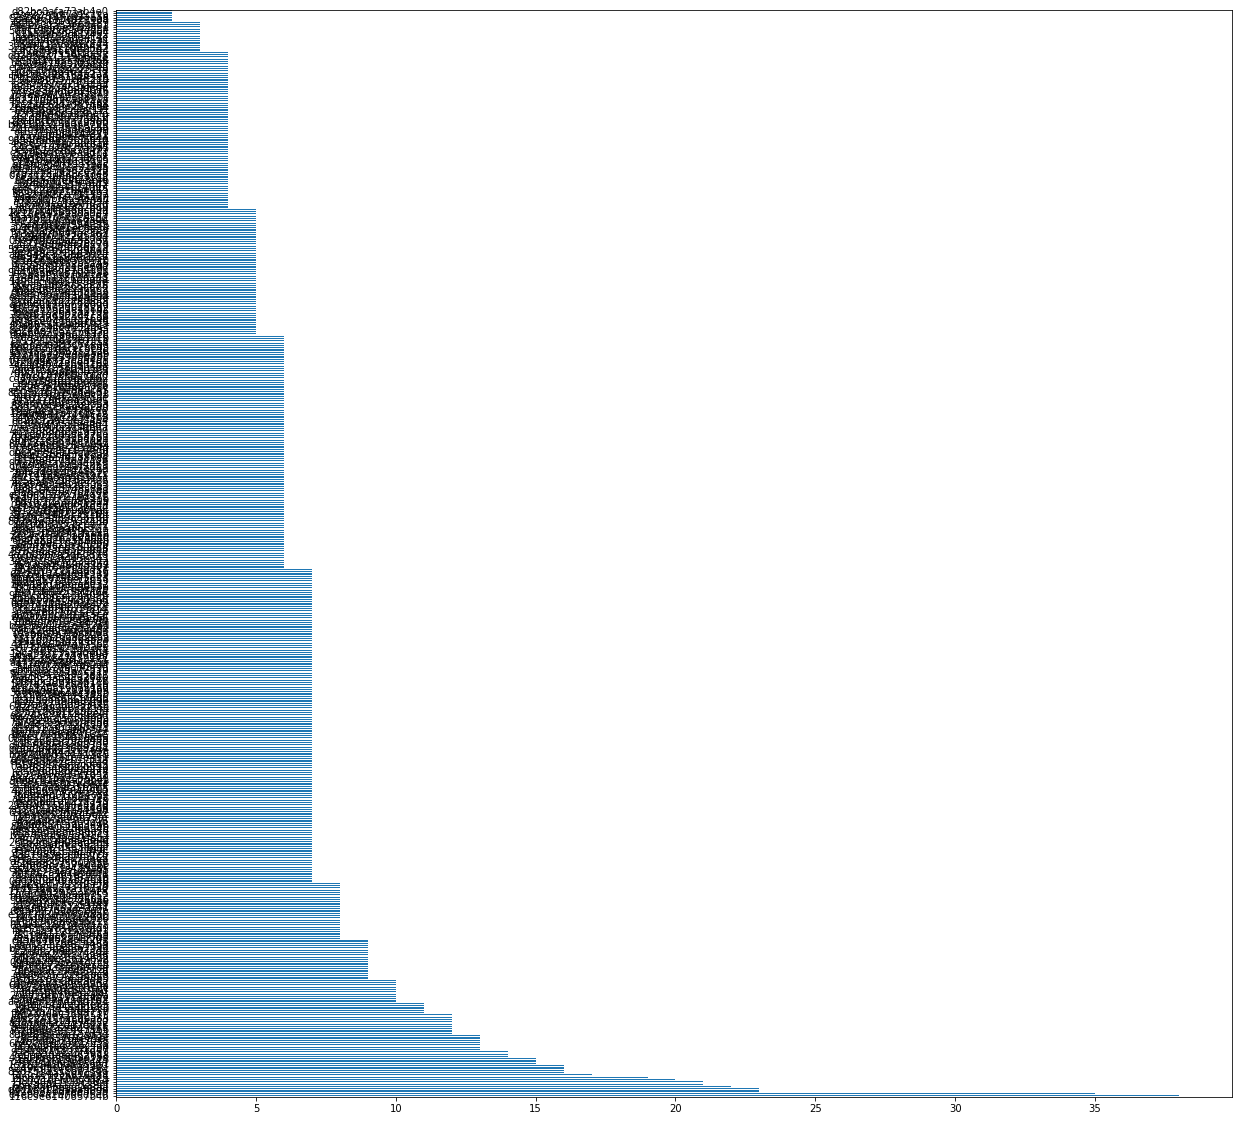

In [711]:
df['reference_id'].value_counts().plot(kind = 'barh', figsize = (20, 20))

In [712]:
def jn(x):
    x = " ".join([ch for ch in x])
    x = str(x)
    return x

In [713]:
df['props_un'] = df['props'].apply(jn)

In [714]:
def jn_name(x):
    x = "".join([ch for ch in x])
    x = str(x)
    return x

In [715]:
df['props_un'] = df['props_un']+ ' ' +df['name'].apply(jn_name)

In [716]:
df.sample(3)

product_id                                               name  \
2553  c932c8095fe281c7  Встраиваемая посудомоечная машина Weissgauff B...   
286   168d8e788004694b         Индукционная плита Hyundai HYC-0105, белый   
2324  b721f9af6372be0e                         Аудиосистема GINZZU GM-427   

                                                  props  is_reference  \
2553                   [Таймер  отсрочки запуска\tесть]         False   
286                           [Управление\tэлектронное]         False   
2324  [MDF, Bluetooth, Диапазон   частот 40 - 20000 ...         False   

          reference_id                                           props_un  
2553  6f205028762b6145  Таймер  отсрочки запуска\tесть Встраиваемая по...  
286   f67deaee31597443  Управление\tэлектронное Индукционная плита Hyu...  
2324  cfc2b5f5c0fa69dd  MDF Bluetooth Диапазон   частот 40 - 20000 Гц ...

In [717]:
def rem_tab(x):
    x = x.replace("\t", " ")
    return x

In [718]:
df['props_un'] = df['props_un'].progress_apply(rem_tab)

100%|██████████| 3251/3251 [00:00<00:00, 317278.60it/s]


In [719]:
df.sample(3)

product_id                                               name  \
2762  d907b5ae97a752ab           Кондиционер MDV MDSAG-09HRN1/MDOAG-09HN1   
188   0dfea74509984564  Настенная сплит-система Samsung AR09TQHQAURNER...   
434   22daf16d2072076e  Ноутбук IdeaPad 5 Pro 14ITL6 14.0 Core i5-1135...   

                                                  props  is_reference  \
2762  [Режим работы\tохлаждение / обогрев, Уровень ш...         False   
188   [Площадь помещения\t26 м², Мощность  кондицион...         False   
434   [Экран\t14" (2240x1400) IPS, Память   RAM 16 Г...         False   

          reference_id                                           props_un  
2762  d3fd12251a6b85f4  Режим работы охлаждение / обогрев Уровень шума...  
188   494195cb88d5e3ad  Площадь помещения 26 м² Мощность  кондиционера...  
434   a97b2ca22a6393b3  Экран 14" (2240x1400) IPS Память   RAM 16 ГБ (...

In [720]:
spec_chars = string.punctuation + '«'+ '»'+ '—'+ '"'+ '"'
print(spec_chars)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~«»—""


In [721]:
def rem_spec_chars(x):
    x = "".join([ch for ch in x if ch not in spec_chars])
    x = "".join([x.replace('\d+', '')])
    return x

In [722]:
df['props_un'] = df['props_un'].progress_apply(rem_spec_chars)


100%|██████████| 3251/3251 [00:00<00:00, 14100.11it/s]


In [723]:
df.sample()

product_id                                               name  \
3200  fb6511b712d35c06  Видеокарта NVIDIA GeForce RTX2060 MSI 12Gb PCI...   

                                                  props  is_reference  \
3200  [Комплектация\tRetail, Объем видеопамяти\t1228...         False   

          reference_id                                           props_un  
3200  f50c3e7f0b02facb  Комплектация Retail Объем видеопамяти 12288 МБ...

In [724]:
def low(x):
  x = list(x.split())
  x = [w.lower() for w in x]
  return x

In [725]:
df['props_un'] = df['props_un'].progress_apply(low)

100%|██████████| 3251/3251 [00:00<00:00, 47745.16it/s]


In [726]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rusla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [727]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [728]:
def stop_words(x):
  new_x = []
  for w in x:
    if w not in russian_stopwords:
        new_x.append(w)
  return new_x

In [729]:
df['props_un'] = df['props_un'].progress_apply(stop_words)

100%|██████████| 3251/3251 [00:00<00:00, 8076.74it/s]


In [730]:
df.sample(3)

product_id                                           name  \
445   239b38d3c02c6729  Смартфон Samsung Galaxy A73 5G 6+128 ГБ белый   
2330  b7762f22120db18f        Компьютерная акустика CBR cms635 дерево   
2082  a3742cb40e485861           Роутер Xiaomi Mi Router 4A DVB4230GL   

                                                  props  is_reference  \
445   [Встроенная память\t128 ГБ, 4 камеры 108 МП, 5...         False   
2330  [Диапазон частот 90 - 18000 Гц, MDF, Материал ...         False   
2082  [Функции и особенности\tподдержка IPv6, Макс. ...         False   

          reference_id                                           props_un  
445   3ef0e6e982996562  [встроенная, память, 128, гб, 4, камеры, 108, ...  
2330  87a78dfb2fbdff0c  [диапазон, частот, 90, 18000, гц, mdf, материа...  
2082  8676768acab9c5ee  [функции, особенности, поддержка, ipv6, макс, ...

In [731]:
import pymorphy2 

In [732]:
morph = pymorphy2.MorphAnalyzer()

In [733]:
def lem(x):
    #x = list(x.split())
    x = [morph.parse(w)[0].normal_form for w in x]
    return x

In [734]:
df['props_un'] = df['props_un'].progress_apply(lem)

100%|██████████| 3251/3251 [00:28<00:00, 112.28it/s]


In [735]:
df.sample(3)

product_id                                               name  \
755   3c2b894444d958db  Колонки 2.1 LOGITECH Z407 графитовый/серый 40В...   
882   4594581418c588fc            Микроволновая печь LG MS-20R42D (белый)   
1323  680983361f9768d3  Видеокарта ASUS TUF Gaming GeForce RTX 3070 V2...   

                                                  props  is_reference  \
755   [Bluetooth, пластик, Диапазон частот 40 - 2000...         False   
882   [Диаметр поддона\t245 мм, Режимы работы\tразмо...         False   
1323  [Комплектация\tRetail, Техпроцесс\t8 нм, TDP\t...          True   

          reference_id                                           props_un  
755   f9fc2a8afa5b2ff5  [bluetooth, пластик, диапазон, частота, 40, 20...  
882   f1d7a6de205f4c9e  [диаметр, поддон, 245, мм, режим, работа, разм...  
1323  680983361f9768d3  [комплектация, retail, техпроцесс, 8, нм, tdp,...

In [736]:
unique_words = {}
for i in tqdm(df.index):
    for j in set(df['props_un'].loc[i]):
        if len(j) == 1:
            pass
        else:
            if j in unique_words.keys():
                unique_words[j] += 1
            else:
                unique_words[j] = 1

100%|██████████| 3251/3251 [00:00<00:00, 14198.17it/s]


In [737]:
pop_words = []
for i in tqdm(unique_words.keys()):
    if unique_words[i] < 4:
        pass
    else:
        pop_words.append(i)

100%|██████████| 4160/4160 [00:00<00:00, 688160.31it/s]


In [738]:
len(pop_words)

2111

In [739]:
df['props_un_len'] = df['props_un'].apply(lambda x: len(x))

<AxesSubplot:>

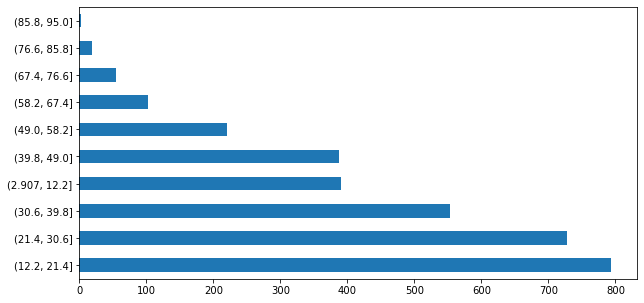

In [756]:
df['props_un_len'].value_counts(bins = 10).plot(kind = 'barh',figsize = (10, 5))

In [757]:
# Максимальное количество слов 
num_words = len(pop_words)
# Максимальная длина новости
max_news_len = 67
# Количество классов новостей
nb_classes = 471

In [758]:
X = df['props_un']
y = df['reference_id']

In [759]:
y = pd.get_dummies(y)

In [760]:
y.sample()

000740b6c1cc763e  0083737f904dd9a9  01378fa92f901df5  01601abb0bf5133d  \
2105                 0                 0                 0                 0   

      01a28e17323d6ef8  01e52344308143f6  0229abcf2ded1058  05a95e7066dc4c52  \
2105                 0                 0                 0                 0   

      05cb692a7fd6c0e6  05d4f6d7e4fe8c4b  ...  f7443cc12811da93  \
2105                 0                 0  ...                 0   

      f90d8061194fbf26  f9fc2a8afa5b2ff5  fb2f4122fc21be6f  fb35f7fa64691535  \
2105                 0                 0                 0                 0   

      fc0a307822fa30f3  fccdc0fdbefeeaa3  fdff5884f8e0cdaf  fee1d1dc53f135d1  \
2105                 0                 0                 0                 0   

      ff5da4be6fa60c4b  
2105                 0  

[1 rows x 471 columns]

In [761]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [762]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [763]:
tokenizer = Tokenizer(num_words=num_words)

In [764]:
tokenizer.fit_on_texts(df['props_un'])

In [765]:
with open("D:/AgoraHack/agorahack-case1-team0/agora_hack_products/tokinaizer.json", "w") as outfile:
    json.dump(tokenizer.word_index, outfile)

In [766]:
train_sequences = tokenizer.texts_to_sequences(X_train)

x_train = pad_sequences(train_sequences, maxlen=max_news_len)

test_sequences = tokenizer.texts_to_sequences(X_test)

x_test = pad_sequences(test_sequences, maxlen=max_news_len)

In [767]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 128, input_length=max_news_len))
model_cnn.add(Conv1D(1024, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dense(471, activation='softmax'))

In [768]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [769]:
model_cnn.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, 67, 128)           270208    
                                                                 
 conv1d_24 (Conv1D)          (None, 63, 1024)          656384    
                                                                 
 global_max_pooling1d_24 (Gl  (None, 1024)             0         
 obalMaxPooling1D)                                               
                                                                 
 dense_65 (Dense)            (None, 512)               524800    
                                                                 
 dense_66 (Dense)            (None, 471)               241623    
                                                                 
Total params: 1,693,015
Trainable params: 1,693,015
Non-trainable params: 0
___________________________________________

In [770]:
model_cnn_save_path = './model_weights/best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [771]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=10,
                            batch_size=64,
                            validation_split=0.02,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 6.1329 - accuracy: 0.0188
Epoch 1: val_accuracy improved from -inf to 0.03846, saving model to ./model_weights\best_model_cnn.h5
40/40 [==============================] - 36s 852ms/step - loss: 6.1329 - accuracy: 0.0188 - val_loss: 6.0468 - val_accuracy: 0.0385
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 5.7275 - accuracy: 0.0341
Epoch 2: val_accuracy did not improve from 0.03846
40/40 [==============================] - 32s 810ms/step - loss: 5.7275 - accuracy: 0.0341 - val_loss: 5.5397 - val_accuracy: 0.0385
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 4.8355 - accuracy: 0.1005
Epoch 3: val_accuracy improved from 0.03846 to 0.09615, saving model to ./model_weights\best_model_cnn.h5
40/40 [==============================] - 33s 834ms/step - loss: 4.8355 - accuracy: 0.1005 - val_loss: 4.4610 - val_accuracy: 0.0962
Epoch 4/10
40/40 [==============================] - ETA: 0s - 

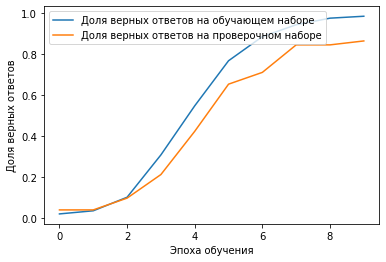

In [772]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть LSTM

In [773]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 256, input_length=max_news_len))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(471, activation='softmax'))

In [774]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [775]:
model_lstm.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_42 (Embedding)    (None, 67, 256)           540416    
                                                                 
 lstm_8 (LSTM)               (None, 128)               197120    
                                                                 
 dense_67 (Dense)            (None, 471)               60759     
                                                                 
Total params: 798,295
Trainable params: 798,295
Non-trainable params: 0
_________________________________________________________________


In [776]:
model_lstm_save_path = './model_weights/best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [777]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=10,
                              batch_size=64,
                              validation_split=0.02,
                              callbacks=[checkpoint_callback_lstm],
                              use_multiprocessing=True)

Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 6.1245 - accuracy: 0.0722
Epoch 1: val_accuracy improved from -inf to 0.07692, saving model to ./model_weights\best_model_lstm.h5
40/40 [==============================] - 23s 470ms/step - loss: 6.1245 - accuracy: 0.0722 - val_loss: 6.0212 - val_accuracy: 0.0769
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 5.7234 - accuracy: 0.0420
Epoch 2: val_accuracy improved from 0.07692 to 0.09615, saving model to ./model_weights\best_model_lstm.h5
40/40 [==============================] - 18s 435ms/step - loss: 5.7234 - accuracy: 0.0420 - val_loss: 5.4111 - val_accuracy: 0.0962
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 4.9462 - accuracy: 0.0706
Epoch 3: val_accuracy improved from 0.09615 to 0.13462, saving model to ./model_weights\best_model_lstm.h5
40/40 [==============================] - 17s 424ms/step - loss: 4.9462 - accuracy: 0.0706 - val_loss: 4.7890 - val_accuracy: 0.1346
Epoc

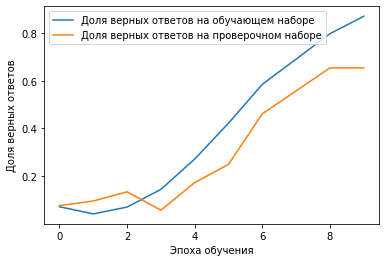

In [778]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [779]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 304, input_length=max_news_len))
model_gru.add(GRU(152))
model_gru.add(Dense(471, activation='softmax'))

In [780]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [781]:
model_gru.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, 67, 304)           641744    
                                                                 
 gru_9 (GRU)                 (None, 152)               208848    
                                                                 
 dense_68 (Dense)            (None, 471)               72063     
                                                                 
Total params: 922,655
Trainable params: 922,655
Non-trainable params: 0
_________________________________________________________________


In [782]:
model_gru_save_path = './model_weights/best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [783]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=10,
                              batch_size=64,
                              validation_split=0.02,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 6.1184 - accuracy: 0.1071
Epoch 1: val_accuracy improved from -inf to 0.11538, saving model to ./model_weights\best_model_gru.h5
40/40 [==============================] - 26s 509ms/step - loss: 6.1184 - accuracy: 0.1071 - val_loss: 6.0444 - val_accuracy: 0.1154
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 5.7021 - accuracy: 0.1056
Epoch 2: val_accuracy did not improve from 0.11538
40/40 [==============================] - 19s 480ms/step - loss: 5.7021 - accuracy: 0.1056 - val_loss: 5.3577 - val_accuracy: 0.0577
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 4.7081 - accuracy: 0.1213
Epoch 3: val_accuracy improved from 0.11538 to 0.13462, saving model to ./model_weights\best_model_gru.h5
40/40 [==============================] - 19s 473ms/step - loss: 4.7081 - accuracy: 0.1213 - val_loss: 4.3588 - val_accuracy: 0.1346
Epoch 4/10
40/40 [==============================] - ETA: 0s - 

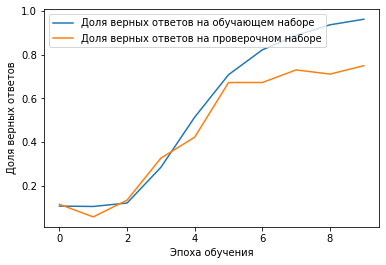

In [784]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [785]:
model_cnn.load_weights(model_cnn_save_path)

In [786]:
model_cnn.evaluate(x_test, y_test, verbose=1)

21/21 [==============================] - 3s 136ms/step - loss: 0.4446 - accuracy: 0.8848


[0.4445546567440033, 0.8847926259040833]

In [787]:
model_lstm.load_weights(model_lstm_save_path)

In [788]:
model_lstm.evaluate(x_test, y_test, verbose=1)

21/21 [==============================] - 3s 133ms/step - loss: 1.5959 - accuracy: 0.7266


[1.595924735069275, 0.7265744805335999]

In [789]:
model_gru.load_weights(model_gru_save_path)

In [790]:
model_gru.evaluate(x_test, y_test, verbose=1)

21/21 [==============================] - 2s 106ms/step - loss: 0.8809 - accuracy: 0.8402


[0.880935788154602, 0.84024578332901]

In [791]:
y_test_pred_cnn = model_cnn.predict(x_test, verbose=1)
y_test_pred_gru = model_gru.predict(x_test, verbose=1)

21/21 [==============================] - 3s 104ms/step


In [792]:
test_pred = np.zeros(y_test_pred_cnn.shape)
for i in tqdm(range(y_test_pred_cnn.shape[0])):
    for j in range(y_test_pred_cnn.shape[1]):
        test_pred[i,j] = max(y_test_pred_cnn[i,j], y_test_pred_gru[i,j])

test_pred.shape

100%|██████████| 651/651 [00:00<00:00, 1307.90it/s]


(651, 471)

In [793]:
test_pred_class = []
for i in range(len(test_pred)):
    index, max_value = max(enumerate(test_pred[i]), key=lambda i_v: i_v[1])
    test_pred_class.append((index))